## 0. Introduction

The purpose of this notebook is to explore jump processes with reference to chapter 11 from *Stochastic Calculus for Finance II Continuous-Time Models* (Shreve, 2008).

## 1. Poisson Process

In the way that Brownian motion is the basic building block for continuous-path processes, the Poisson process serves as the starting point for jump processes. 

To construct a Poisson process, we begin with a sequence $\tau_1, \tau_2, \ldots$ of independent exponential random variables, all with the same mean $\frac{1}{\lambda}$. We will build a model in which an event, which we call a *jump*, occurs from time to time. The first jump occurs at time $\tau_1$, the second occurs $\tau_2$ time units after the first, the third occurs $\tau_3$ time units after the second, etc. The $\tau_k$ random variables are called the *interarrival times*. The *arrival times* are

$$ S_n = \sum_{k=1}^n \tau_k $$

(i.e., $S_n$ is the time of the $n^\text{th}$ jump). The *Poisson process* $N(t)$ counts the number of jumps that occur at or before time $t$. More precisely,

$$
N(t) =
\begin{cases} 
0 \text{ if } 0 \leq t < S_1, \\
1 \text{ if } S_1 \leq t < S_2, \\
\vdots \\
n \text{ if } S_n \leq t < S_{n+1}, \\
\vdots
\end{cases}
$$

Note that at the jump times $N(t)$ is defined so that it is *right-continuous* (i.e., $N(t) = \lim_{s \downarrow t} N(s)$). We denote by $\mathcal{F}(t)$ the $\sigma$-algebra of information acquired by observing $N(s)$ for $0 \leq s \leq t$. Because the expected time between jumps is $\frac{1}{\lambda}$, the jumps are arriving at an average rate of $\lambda$ per unit time. We say the Poisson process $N(t)$ has *intensity* $\lambda$. The figure below shows one path of a Poisson process.

<center><img src="../figures/poisson_process.png" width="375" height="215"/></center>

When a Poisson process or a compensated Poisson process jumps, it jumps up one unit. For models of financial markets, we need to allow the jump size to be random.

Let $N(t)$ be a Poisson process with intensity $\lambda$, and let $Y_1, Y_2, \ldots$ be a sequence of identically distributed random variables with mean $\beta = \mathbb{E}Y_i$. We assume the random variables $Y_1, Y_2, \ldots$ are independent of one another and also independent of the Poisson process $N(t)$. We define the *compound Poisson process*

$$ Q(t) = \sum_{i=1}^{N(t)} Y_i, \quad t \geq 0. $$

The jumps in $Q(t)$ occur at the same times as the jumps in $N(t)$, but whereas the jumps in $N(t)$ are always of size 1, the jumps in $Q(t)$ are of random size. The first jump is of size $Y_1$, the second of size $Y_2$, etc. The figure below shows one path of a compound Poisson process.

<center><img src="../figures/compound_poisson_process.png" width="375" height="215"/></center>

Like the simple Poisson process $N(t)$, the increments of the compound Poisson process $Q(t)$ are independent. In particular, for $0 \leq s < t$,

$$ Q(s) = \sum_{i=1}^{N(s)} Y_i, $$

which sums up the first $N(s)$ jumps, and

$$ Q(t) - Q(s) = \sum_{i=N(s)+1}^{N(t)} Y_i, $$

which sums up jumps $N(s) + 1$ to $N(t)$, are independent. Moreover, $Q(t) - Q(s)$ has the same distribution as $Q(t - s)$ because $N(t) - N(s)$ has the same distribution as $N(t - s)$.

The mean of the compound Poisson process is

$$
\begin{aligned}
\mathbb{E}Q(t) &= \sum_{k=0}^{\infty} \mathbb{E}\left[\sum_{i=1}^k Y_i \mid N(t) = k\right] \mathbb{P}\{N(t) = k\} \\
&= \sum_{k=0}^{\infty} \beta k \frac{(\lambda t)^k}{k!} e^{-\lambda t} = \beta \lambda t e^{-\lambda t} \sum_{k=1}^\infty \frac{(\lambda t)^{k - 1}}{(k - 1)!} = \beta \lambda t. \\
\end{aligned}
$$

On average, there are $\lambda t$ jumps in the time interval $[0, t]$, the average jump size is $\beta$, and the number of jumps is independent of the size of the jumps. Hence, $\mathbb{E}Q(t)$ is the product $\beta \lambda t$.

## 2. Jump Processes and Their Integrals

We wish to define the stochastic integral

$$ \int_0^t \varPhi(s) \, dX(s), $$

where the integrator $X$ can have jumps. Let $(\Omega, \mathcal{F}, \mathbb{P})$ be a probability space on which is given a filtration $\mathcal{F}(t), t \geq 0$. All processes will be adapted to this filtration. Furthermore, the integrators we consider in this section will be right-continuous and of the form

$$ X(t) = X(0) + I(t) + R(t) + J(t), \tag{2.1} $$

where $X(0)$ is a nonrandom initial condition. The process

$$ I(t) = \int_{0}^{t} \Gamma(s) \, dW(s) $$

is an *Itô integral* of an adapted process $\Gamma(s)$ with respect to a Brownian motion relative to the filtration. We shall call $I(t)$ the *Itô integral part of $X$*. The process $R(t)$ in equation (2.1) is a *Riemann integral*

$$ R(t) = \int_{0}^{t} \varTheta(s) \, ds $$

for some adapted process $\varTheta(t)$. We shall call $R(t)$ the *Riemann integral part of $X$*. The *continuous part* of $X(t)$ is defined to be

$$ X^c(t) = X(0) + I(t) + R(t) = X(0) + \int_{0}^{t} \Gamma(s) \, dW(s) + \int_{0}^{t} \varTheta(s) \, ds. $$

The quadratic variation of this process is

$$ \left[X^c, X^c\right] (t) = \int_{0}^{t} \Gamma^2 (s) \, ds, $$

an equation that we write in differential form as

$$ dX^c (t) \, dX^c (t)= \Gamma^2 (t) \, dt. $$

Finally, in equation (2.1), $J(t)$ is an adapted, right-continuous *pure jump process* with $J(0) = 0$. By *right-continuous*, we mean that $J(t) = \lim_{s \downarrow t} J(s)$ for all $t \geq 0$. The *left-continuous* version of such a process will be denoted $J(t-)$. In other words, if $J$ has a jump at time $t$, then $J(t)$ is the value of $J$ immediately after the jump, and $J(t-)$ is its value immediately before the jump. We assume that $J$ does not jump at time zero, has only finitely many jumps on each finite time interval $(0, T]$, and is constant between jumps. The constancy between jumps is what justifies calling $J(t)$ a *pure* jump process. A Poisson process and a compound Poisson process have this property. A compensated Poisson process does not because it decreases between jumps. We shall call $J(t)$ the *pure jump part of $X$*.

The Itô-Doeblin formula for jump processes is not covered here but can be found on pages 483-492 (Shreve, 2008).

## 3. Merton Jump-Diffusion Process

The Merton jump-diffusion process is described by the following SDE:

$$ dX_t = \mu S_t \, dt + \sigma S_t \, dW + S_t \, dJ_t, $$

where $J = \{J_t, t \in [0, T]\}$ is an adapted compound Poisson process, defined by

$$ J_t = \sum_{i=1}^{N_t} Y_i, $$

where $N = \{N_t, t \in [0, T]\}$ is an adapted standard Poisson process with intensity $\lambda > 0$ and where 

$$Y_i \sim \mathcal{N}(\alpha, \xi^2)$$ 

are the sizes of the jumps with mean $\alpha$ and variance $\xi^2$.

Let's simulate the process in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
# Define parameters 
T = 1.0                        # time horizon
N = 252                        # number of steps within time horizon
t = np.linspace(0, T, N+1)     # from 0 to T with N+1 points (inclusive of T)
dt = T / N                     # time step increment
M = 1000                       # number of simulations
mu = 0.1                       # drift coefficient per unit T
sigma = 0.3                    # volatility per unit T
lambda_jump = 0.18             # mean number of jumps per unit T
mu_jump = 0.2                  # mean jump size per unit T
sigma_jump = 0.5               # jump size volatility per unit T
S0 = 100.0                     # initial asset price

 ### 3.1 Euler-Maruyama Method

Simulates the Merton jump-diffusion process step-by-step.

In [3]:
# Initialize an array to store the simulated paths
S = np.zeros((N+1, M))
S[0, :] = S0

# Simulate the GBM and jump process
Z = ss.norm.rvs(loc=0, scale=1, size=(N, M), random_state=42)
J_size = ss.norm.rvs(loc=mu_jump, scale=sigma_jump, size=(N, M), random_state=43)
J_occur = ss.poisson.rvs(mu=lambda_jump*dt, size=(N, M), random_state=44)

# Simulate the paths
for i in range(1, N+1):
    S[i, :] = S[i-1, :] * np.exp((mu - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * Z[i-1, :] + 
                                 J_size[i-1, :] * J_occur[i-1, :])

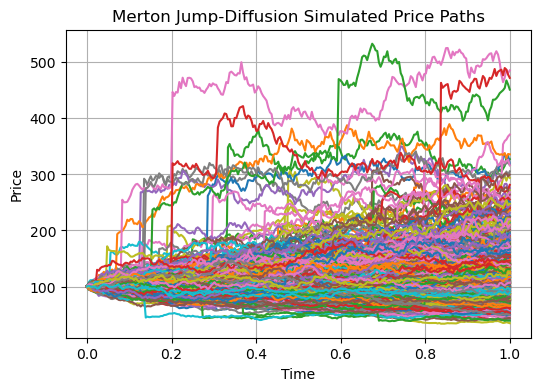

In [4]:
# Plot the simulated price paths
plt.figure(figsize=(6,4))
plt.plot(t, S)
plt.title('Merton Jump-Diffusion Simulated Price Paths')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

 ### 3.2 Analytical Method

Utilizes vectorized operations to compute cumulative sums of log return and jump increments.

In [5]:
# Initialize an array to store the simulated paths
S = np.zeros((N+1, M))
S[0, :] = S0

# Simulate the Merton Jump Diffusion process
Z = ss.norm.rvs(loc=(mu - sigma**2 / 2) * dt, scale= sigma * np.sqrt(dt), size=(N, M), random_state=42)
J_size = ss.norm.rvs(loc=mu_jump, scale=sigma_jump, size=(N,M), random_state=43)
J_occur = ss.poisson.rvs(mu=lambda_jump * dt, size=(N, M), random_state=44)

# Calculate the asset price paths
S[1:, :] = S0 * np.exp(np.cumsum(Z, axis=0) + np.cumsum(J_size * J_occur, axis=0))

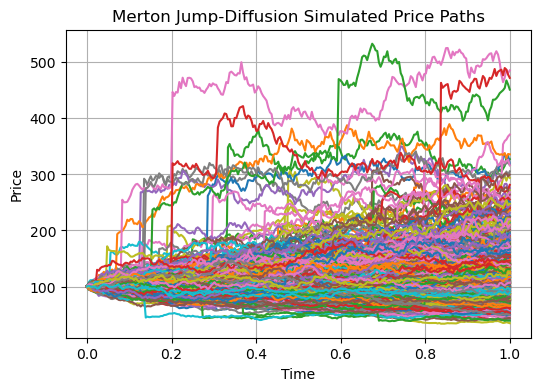

In [6]:
# Plot the simulated price paths
plt.figure(figsize=(6,4))
plt.plot(t, S)
plt.title('Merton Jump-Diffusion Simulated Price Paths')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()